In [8]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt

In [10]:
!git clone https://github.com/taehojo/data.git

Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Unpacking objects: 100% (21/21), done.


In [11]:
#데이터셋 불러오기
df = pd.read_csv('./data/pima-indians-diabetes3.csv')

In [12]:
# 세부정보 X로 지정
X=df.iloc[:,0:8]

In [13]:
# 당뇨병 여부 Y로 지정
y=df.iloc[:,8]

In [14]:
# 스텐다드 스케일링(데이터 정제) - nan데이터 구분????
ss =StandardScaler()

In [15]:
scaled_X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

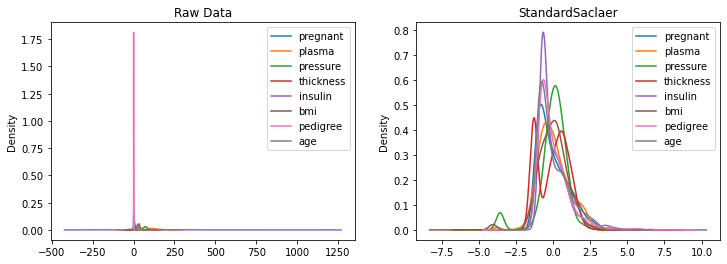

In [19]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))
X.plot(kind='kde', title = 'Raw Data', ax=ax[0])
scaled_X.plot(kind='kde', title = 'StandardSaclaer', ax=ax[1])
plt.show()

In [20]:
#훈련셋과 테스트 셋을 나눠줌
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [21]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
##Decision Tree


In [40]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator = classifier, X=X_train, y=y_train, cv=skf)
# 정규분포에서 std는 결과값이 많이 퍼져있는지 모여있는지 확인할 수 있는 척도가 됨 
print("Accuracy:{:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy:66.32 %
Standard Deviation: 6.24%


In [41]:
# 랜덤 포레스트

In [45]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=50)
classifier.fit(X_train, y_train)

y_pred= classifier.predict(X_test)

skf= StratifiedKFold(n_splits=10, shuffle=True)

accuracies  = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 75.36%
Standard Deviation: 3.68%


In [46]:
# 정규분포 = 가우시안

In [48]:
from sklearn.naive_bayes import GaussianNB

classifier= GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 75.69%
Standard Deviation: 4.85%


In [49]:
# k - 최근접 이웃

In [50]:
#@title 기본 제목 텍스트
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator = classifier, X=X_train, y=y_train, cv= skf)
print("Accuracy:{:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy:70.48%
Standard Deviation: 6.34%


In [51]:
# 에이다부스트

In [53]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation:{:.2f}%".format(accuracies.std()*100))

Accuracy: 72.92%
Standard Deviation:5.37%


In [54]:
#이차 판별 분석

In [55]:
# 구분선이 곡선
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifier = QuadraticDiscriminantAnalysis()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
skf= StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy:{:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation:{:.2f}%".format(accuracies.std()*100))

Accuracy:73.61%
Standard Deviation:3.68%


In [56]:
#서포트 벡터 머신

In [58]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy:{:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation:{:.2f}%".format(accuracies.std()*100))

Accuracy:75.87%
Standard Deviation:5.21%


In [59]:
print(y_pred)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0]


In [60]:
# 서포트 벡터 머신- RBF커널

In [61]:
from sklearn.svm import SVC

classifier = SVC(kernel='rbf')
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy:{:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation:{:.2f}%".format(accuracies.std()*100))

Accuracy:74.68%
Standard Deviation:4.54%


In [62]:
#보팅

In [65]:
from sklearn.ensemble import VotingClassifier

clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel='linear')
classifier = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)])
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy:{:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation:{:.2f}%".format(accuracies.std()*100))

Accuracy:75.18%
Standard Deviation:4.50%


In [66]:
#배깅

In [68]:
from sklearn.ensemble import BaggingClassifier

classifier = BaggingClassifier(base_estimator=SVC(kernel='rbf'), n_estimators=10)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy:{:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy:75.67%
Standard Deviation: 7.26%


In [69]:
# 여러알고리즘의 성능을 한눈에 비교하기

In [71]:
classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB(),
               KNeighborsClassifier(),
               SVC(kernel='linear'),
               SVC(kernel='rbf'),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis(),
               VotingClassifier(estimators=[('1', AdaBoostClassifier()),
                                            ('2', RandomForestClassifier()),
                                            ('3', SVC(kernel='linear'))]),
               BaggingClassifier(base_estimator=clf3, n_estimators=10,
                                 random_state=0)
               ]


In [72]:
classifier_names = ['D_tree',
                    'RF',
                    'GNB',
                    'KNN',
                    'Ada',
                    'QDA',
                    'SVM_1',
                    'SVM_k',
                    'Voting',
                    'bagging'
                    ]

In [73]:
modelaccuracies = []
modelmeans = []
modelnames = []

mean accuracy of D_tree :68.04%
mean accuracy of RF :73.25%
mean accuracy of GNB :75.34%
mean accuracy of KNN :69.98%
mean accuracy of Ada :75.88%
mean accuracy of QDA :74.29%
mean accuracy of SVM_1 :75.00%
mean accuracy of SVM_k :73.42%
mean accuracy of Voting :76.23%
mean accuracy of bagging :76.18%


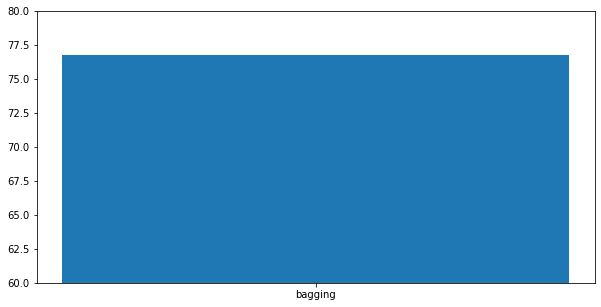

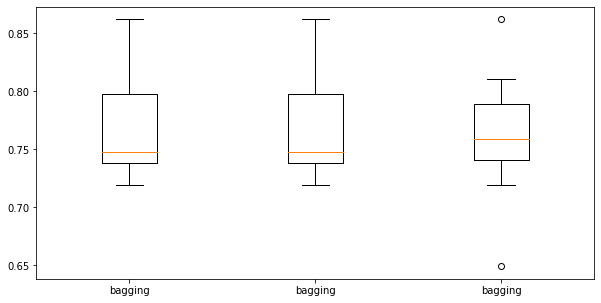

In [86]:
classifier_data = zip(classifier_names, classifiers)
for classifier_name, classifier in classifier_data:
  skf = StratifiedKFold(n_splits=10, shuffle = True)
  accuracies = cross_val_score(classifier, X=X_train, y=y_train, cv=skf)
  print("mean accuracy of", classifier_name, ":{:.2f}%".format
        (accuracies.mean()*100))
  
modelaccuracies.append(accuracies)
modelnames.append(classifier_name)
modelmeans.append(accuracies.mean()*100)

plt.figure(figsize=(10,5))
plt.ylim([60,80])
plt.bar(modelnames, modelmeans);

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()